<a href="https://colab.research.google.com/github/Kharazmigroup/forexprj/blob/main/RNN2Farex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all libraries
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN,RNN
from keras.layers import Dropout
import IPython
import IPython.display
from math import floor

In [ ]:
test_inputs = []
test_labels = []

In [ ]:
df_stock = yf.download('EURUSD=X', start='2000-01-01', end='2023-10-14')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0
...,...,...,...,...,...,...
2023-10-09,1.056747,1.057641,1.052144,1.056747,1.056747,0
2023-10-10,1.057888,1.061954,1.055598,1.057888,1.057888,0
2023-10-11,1.060479,1.063355,1.059277,1.060479,1.060479,0


In [ ]:
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

In [ ]:
def spilitData(df_stock_norm):
  column_indices = {name: i for i, name in enumerate(df_stock_norm.columns)}

  n = len(df_stock_norm)
  train_df = df_stock_norm[0:int(n*0.8)]
  val_df = df_stock_norm[int(n*0.8):int(n*0.9)]
  test_df = df_stock_norm[int(n*0.9):]

  num_features = df_stock_norm.shape[1]
  return column_indices,train_df,val_df,test_df

In [ ]:
column_indices,train_df,val_df,test_df = spilitData(df_stock_norm)

In [ ]:
test_df[240:248]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-23,0.038423,0.028650,0.592599,0.038387,0.984155,0
2022-09-26,0.014678,0.004691,0.584568,0.014664,0.968992,0
2022-09-27,0.004310,0.000000,0.585375,0.004306,0.962371,0
2022-09-28,0.000000,0.002549,0.581785,0.000000,0.959619,0
2022-09-29,0.017536,0.018443,0.588264,0.017519,0.970817,0
2022-09-30,0.036545,0.028299,0.594720,0.036510,0.982956,0
2022-10-03,0.030772,0.027399,0.595880,0.030742,0.979269,0
2022-10-04,0.036939,0.048769,0.599385,0.036903,0.983207,0


In [ ]:
df_stock_norm[0:int(n*0.7)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,0.381761,0.372752,0.740507,0.370604,1.196501,0
2003-12-02,0.370333,0.383598,0.740639,0.389998,1.208897,0
2003-12-03,0.390533,0.386901,0.749289,0.395317,1.212298,0
2003-12-04,0.395237,0.389102,0.747109,0.388741,1.208094,0
2003-12-05,0.388658,0.396483,0.748558,0.405326,1.218695,0
...,...,...,...,...,...,...
2017-10-31,0.321605,0.312810,0.719484,0.321743,1.165270,0
2017-11-01,0.321882,0.312575,0.718343,0.321594,1.165175,0
2017-11-02,0.318359,0.317268,0.719698,0.317990,1.162872,0


In [ ]:
train_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,0.381761,0.372752,0.740507,0.370604,1.196501,0
2003-12-02,0.370333,0.383598,0.740639,0.389998,1.208897,0
2003-12-03,0.390533,0.386901,0.749289,0.395317,1.212298,0
2003-12-04,0.395237,0.389102,0.747109,0.388741,1.208094,0
2003-12-05,0.388658,0.396483,0.748558,0.405326,1.218695,0
...,...,...,...,...,...,...
2019-10-24,0.240608,0.235232,0.684373,0.240339,1.113239,0
2019-10-25,0.236195,0.228980,0.683488,0.235891,1.110396,0
2019-10-28,0.233110,0.225948,0.683270,0.232810,1.108426,0


In [ ]:
class WindowGenerator():

  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])
  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
seq_len = 3 # taken sequence length as 3
n_steps = seq_len-1
#n_inputs = 6
n_neurons = 800
#n_outputs = 6
n_layers = 3
learning_rate = 0.000097
batch_size = 64
dropout_rate = 0.2


In [ ]:
def make_dataset(self, data):
  if isinstance(data, pd.DataFrame):
    data = np.array(data, dtype=np.float32)

  ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        batch_size=batch_size)

  ds = ds.map(self.split_window)
  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
multi_window = WindowGenerator(input_width=n_steps,
                               label_width=1,
                               shift=1)
multi_window.train = multi_window.make_dataset(train_df)
multi_window.val = multi_window.make_dataset(val_df)
multi_window.test = multi_window.make_dataset(test_df)

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    layers = [tf.keras.layers.SimpleRNNCell(units=n_neurons)
         for layer in range(n_layers)]
    self.lstm_cell = tf.keras.layers.StackedRNNCells(layers)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    #self.dense1 = tf.keras.layers.Dense(64, activation='relu')
    #self.dense2 = tf.keras.layers.Dense(32, activation='relu')
    #self.dropout2 = tf.keras.layers.Dropout(dropout_rate)
    #self.output_layer = tf.keras.layers.Dense(num_features, activation='linear')
    self.dense = tf.keras.layers.Dense(num_features,activation = 'relu')

In [ ]:
feedback_model = FeedBack(units=n_neurons, out_steps = n_steps)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)
  # predictions.shape => (batch, features)
  prediction = self.dense(x)

  return prediction, state

FeedBack.warmup = warmup

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                          training=training)
    if training:
      x = self.dropout(x)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
#MAX_EPOCHS = 150

def compile_and_fit(model, window,epoch, patience=2):
  #=early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
    #                                                patience=patience,
     #                                               mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(multi_window.train, epochs=epoch,
                      validation_data=multi_window.val)
                     # callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(feedback_model, multi_window,150)



Epoch 1/150
65/65 [==============================] - 15s 48ms/step - loss: 0.1311 - mean_absolute_error: 0.2249 - val_loss: 0.0954 - val_mean_absolute_error: 0.1911
Epoch 2/150
65/65 [==============================] - 1s 22ms/step - loss: 0.1027 - mean_absolute_error: 0.1682 - val_loss: 0.0197 - val_mean_absolute_error: 0.0875
Epoch 3/150
65/65 [==============================] - 2s 24ms/step - loss: 0.0105 - mean_absolute_error: 0.0619 - val_loss: 0.0077 - val_mean_absolute_error: 0.0549
Epoch 4/150
65/65 [==============================] - 2s 25ms/step - loss: 0.0051 - mean_absolute_error: 0.0433 - val_loss: 5.6853e-04 - val_mean_absolute_error: 0.0177
Epoch 5/150
65/65 [==============================] - 1s 22ms/step - loss: 0.0014 - mean_absolute_error: 0.0240 - val_loss: 1.5266e-04 - val_mean_absolute_error: 0.0088
Epoch 6/150
65/65 [==============================] - 1s 21ms/step - loss: 0.0016 - mean_absolute_error: 0.0246 - val_loss: 6.0916e-04 - val_mean_absolute_error: 0.0166
Epo

In [ ]:
test_inputs = []
test_labels = []
for inputs, labels in multi_window.test:
    test_inputs.append(inputs.numpy())
    test_labels.append(labels.numpy())

In [ ]:
test_batch = []
test_batch_labels = []
for i in range(len(test_labels)):
  for j in range(len(test_labels[i])):
    test_batch_labels.append(test_labels[i][j])
    test_batch.append(test_inputs[i][j])

In [ ]:
test4Dynamic = np.array(test_batch)
test4Dynamic_labels = np.array(test_batch_labels)

In [ ]:
train_inputs = []
train_labels = []
for inputs, labels in multi_window.train:
    train_inputs.append(inputs.numpy())
    train_labels.append(labels.numpy())

In [ ]:
train_batch_labels = []
train_batch = []
for i in range(len(train_labels)):
  for j in range(len(train_labels[i])):
    train_batch_labels.append(train_labels[i][j])
    train_batch.append( train_inputs[i][j])

In [ ]:
train4Dynamic = np.array(train_batch)
train4Dynamic_label = np.array(train_batch_labels)

Open	High	Low	Close	Adj Close	Volume

In [ ]:
data = {
    'Date': pd.to_datetime(['2023-10-14', '2023-10-15', '2023-10-16', '2023-10-17', '2023-10-18']),
    'Open': [0] * 5,
    'High': [0] * 5,
    'Low': [0] * 5,
    'Close': [0] * 5,
    'Adj Close': [0] * 5,
    'Volume' : [0] * 5
}
df_next_days = pd.DataFrame(data)
df_next_days = df_next_days.set_index('Date')

In [ ]:
multi_window.test2 = multi_window.make_dataset(df_next_days)

In [ ]:
df_next_days

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-14,0,0,0,0,0,0
2023-10-15,0,0,0,0,0,0
2023-10-16,0,0,0,0,0,0
2023-10-17,0,0,0,0,0,0
2023-10-18,0,0,0,0,0,0


In [ ]:
predictions = feedback_model.predict(multi_window.test2)

1/1 [==============================] - 0s 55ms/step


In [ ]:
predictions

array([[[0.10923573, 0.1129597 , 0.378613  , 0.08878355, 0.63107574,
         0.        ],
        [0.00214181, 0.0020499 , 0.23507436, 0.00602888, 0.41243395,
         0.        ]],

       [[0.10923573, 0.1129597 , 0.378613  , 0.08878355, 0.63107574,
         0.        ],
        [0.00214181, 0.0020499 , 0.23507436, 0.00602888, 0.41243395,
         0.        ]],

       [[0.10923573, 0.1129597 , 0.378613  , 0.08878355, 0.63107574,
         0.        ],
        [0.00214181, 0.0020499 , 0.23507436, 0.00602888, 0.41243395,
         0.        ]]], dtype=float32)

In [ ]:
predictions = feedback_model.predict(multi_window.test)

9/9 [==============================] - 0s 6ms/step


In [ ]:
predictions.shape

(514, 2, 6)

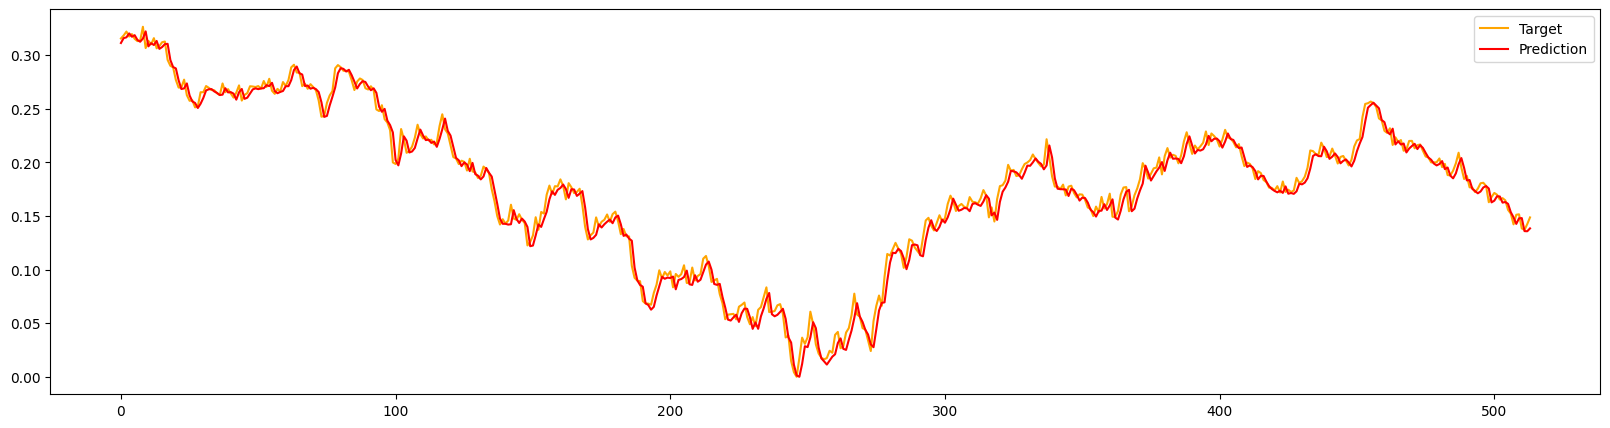

In [ ]:
# ploting the graph
comp = pd.DataFrame({'Column1':test4Dynamic_labels[:,-1,:][:,3],'Column2':predictions[:,-1,:][:,3]})
plt.figure(figsize=(20,5))
plt.plot(comp['Column1'], color='orange', label='Target')
plt.plot(comp['Column2'], color='red', label='Prediction')
plt.legend()
plt.show()

In [ ]:
def plot(history):
  acc = history.history['mean_absolute_error']
  val_acc = history.history['val_mean_absolute_error']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, label='Training Accuracy')
  plt.plot(epochs, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

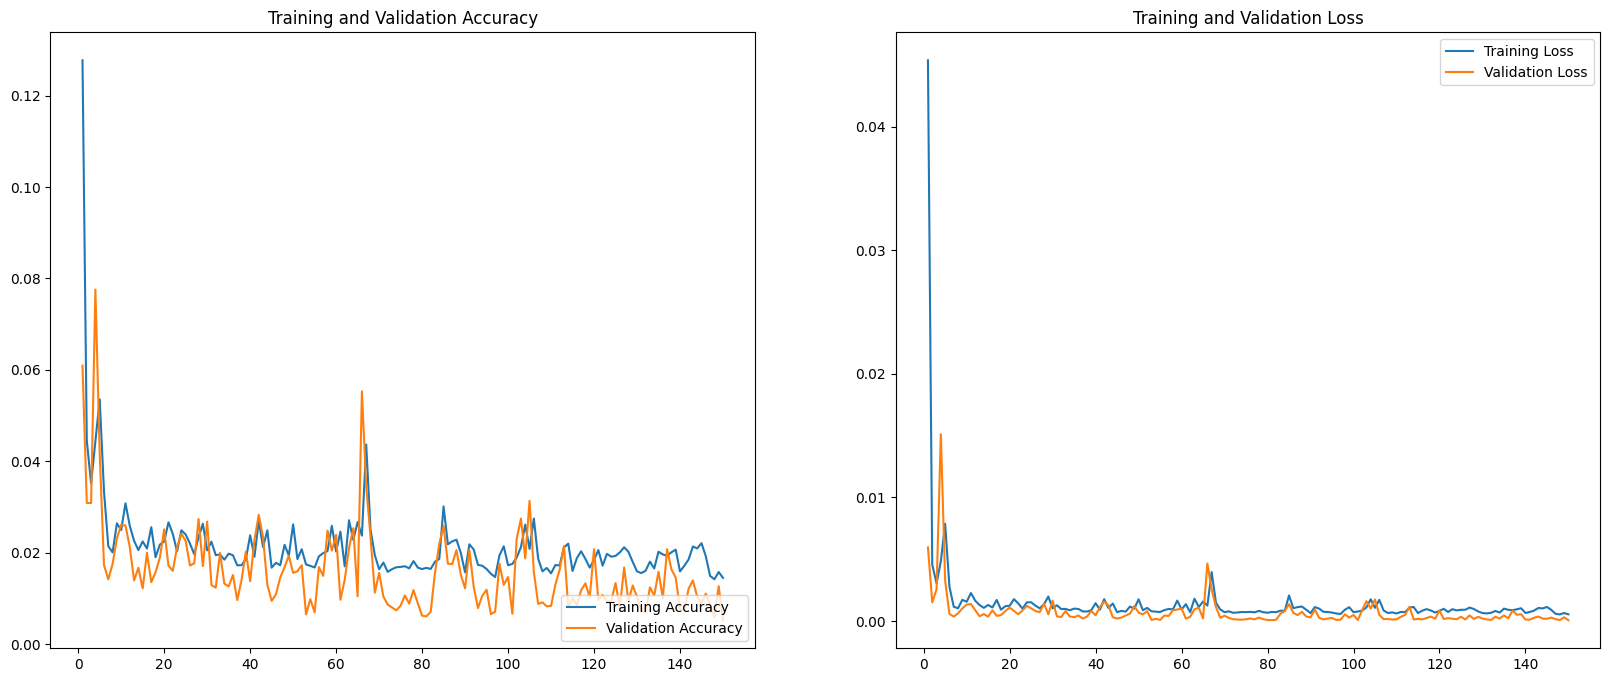

In [ ]:
plot(history)

In [ ]:
len(predictions)

514

In [ ]:
amount_of_profit = 0
for i in range(1,len(predictions)):
  if (test4Dynamic[i,-1,3] > test4Dynamic[i-1,-1,3]):
    if(test4Dynamic[i-1,-1,3]==0):
          print("i zero...else..."+str(i))
    else:
      if(predictions[i,-1,3] > test4Dynamic[i-1,-1,3]):
        amount_of_profit += ((min(predictions[i,-1,3],test4Dynamic[i,-1,3])-test4Dynamic[i-1,-1,3])/test4Dynamic[i-1,-1,3]) *10000
      else:
        amount_of_profit += -(test4Dynamic[i,-1,3] - test4Dynamic[i-1,-1,3])/test4Dynamic[i-1,-1,3] * 10000
  else:
    if(test4Dynamic[i-1,-1,3]==0):
          print("i zero...else..."+str(i))
    else:
      if (predictions[i,-1,3] <test4Dynamic[i-1,-1,3] ):
        amount_of_profit += (test4Dynamic[i-1,-1,3] - max(predictions[i,-1,3],test4Dynamic[i,-1,3]))/test4Dynamic[i-1,-1,3] * 10000
      else:
        amount_of_profit += (test4Dynamic[i,-1,3]-test4Dynamic[i-1,-1,3])/test4Dynamic[i-1,-1,3]*10000

i zero...else...248


In [ ]:
amount_of_profit

233834.13691386522

In [ ]:
predictions[196,-1,3]

0.084338576

In [ ]:
test4Dynamic_labels[196,-1,3]

0.099367954

In [ ]:
test4Dynamic_labels[195,-1,3]

0.085889325

In [ ]:
len_recent_data = 5
i = 0
new_predictions = np.empty(shape = (0,n_steps,num_features))
print("len new pre..."+str(len(new_predictions)))
iteration = floor(len(test4Dynamic)/len_recent_data)
while i < iteration*len_recent_data :
    npredictions = feedback_model.predict(test4Dynamic[i:i+len_recent_data])
    new_predictions = np.concatenate((new_predictions, npredictions), axis=0)
    combined_data = np.concatenate((train4Dynamic, test4Dynamic[i:i+len_recent_data]), axis=0)
    combined_data_labels = np.concatenate((train4Dynamic_label, test4Dynamic_labels[i:i+len_recent_data]), axis=0)
    #multi_window.train = multi_window.make_dataset(combined_data)
    feedback_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = feedback_model.fit(combined_data,combined_data_labels, epochs=5,
                      validation_data=multi_window.val,batch_size=64)
    i += len_recent_data
    print("itrration....."+str(i))
print("last i...."+str(i))

len new pre...0
1/1 [==============================] - 0s 353ms/step
Epoch 1/5
65/65 [==============================] - 4s 15ms/step - loss: 6.2068e-04 - mean_absolute_error: 0.0152 - val_loss: 7.6720e-05 - val_mean_absolute_error: 0.0063
Epoch 2/5
65/65 [==============================] - 1s 11ms/step - loss: 4.9011e-04 - mean_absolute_error: 0.0133 - val_loss: 6.3078e-05 - val_mean_absolute_error: 0.0056
Epoch 3/5
65/65 [==============================] - 1s 10ms/step - loss: 4.9951e-04 - mean_absolute_error: 0.0134 - val_loss: 6.4324e-05 - val_mean_absolute_error: 0.0058
Epoch 4/5
65/65 [==============================] - 1s 14ms/step - loss: 5.0521e-04 - mean_absolute_error: 0.0136 - val_loss: 4.4800e-05 - val_mean_absolute_error: 0.0046
Epoch 5/5
65/65 [==============================] - 1s 16ms/step - loss: 5.0695e-04 - mean_absolute_error: 0.0134 - val_loss: 1.1613e-04 - val_mean_absolute_error: 0.0082
itrration.....5
1/1 [==============================] - 0s 220ms/step
Epoch 1/5
65

1/1 [==============================] - 0s 210ms/step
Epoch 1/5
65/65 [==============================] - 4s 14ms/step - loss: 5.7371e-04 - mean_absolute_error: 0.0147 - val_loss: 6.4281e-05 - val_mean_absolute_error: 0.0059
Epoch 2/5
65/65 [==============================] - 1s 11ms/step - loss: 4.8360e-04 - mean_absolute_error: 0.0131 - val_loss: 6.8414e-05 - val_mean_absolute_error: 0.0062
Epoch 3/5
65/65 [==============================] - 1s 10ms/step - loss: 4.6165e-04 - mean_absolute_error: 0.0128 - val_loss: 1.0154e-04 - val_mean_absolute_error: 0.0074
Epoch 4/5
65/65 [==============================] - 1s 15ms/step - loss: 4.6905e-04 - mean_absolute_error: 0.0128 - val_loss: 5.4318e-05 - val_mean_absolute_error: 0.0052
Epoch 5/5
65/65 [==============================] - 1s 14ms/step - loss: 4.8984e-04 - mean_absolute_error: 0.0133 - val_loss: 5.8698e-05 - val_mean_absolute_error: 0.0055
itrration.....20


1/1 [==============================] - 0s 214ms/step
Epoch 1/5
65/65 [==============================] - 4s 14ms/step - loss: 5.4481e-04 - mean_absolute_error: 0.0143 - val_loss: 5.4050e-05 - val_mean_absolute_error: 0.0051
Epoch 2/5
65/65 [==============================] - 1s 11ms/step - loss: 4.4865e-04 - mean_absolute_error: 0.0126 - val_loss: 5.3782e-05 - val_mean_absolute_error: 0.0053
Epoch 3/5
65/65 [==============================] - 1s 16ms/step - loss: 4.7473e-04 - mean_absolute_error: 0.0130 - val_loss: 8.6308e-05 - val_mean_absolute_error: 0.0068
Epoch 4/5
65/65 [==============================] - 1s 17ms/step - loss: 4.7450e-04 - mean_absolute_error: 0.0130 - val_loss: 5.5130e-05 - val_mean_absolute_error: 0.0053
Epoch 5/5
65/65 [==============================] - 1s 11ms/step - loss: 4.5620e-04 - mean_absolute_error: 0.0128 - val_loss: 1.4839e-04 - val_mean_absolute_error: 0.0089
itrration.....25
1/1 [==============================] - 0s 201ms/step
Epoch 1/5
65/65 [==========

In [ ]:
new_predictions.shape

(510, 2, 6)

In [ ]:

npredictions = feedback_model.predict(test4Dynamic[i:])
new_predictions = np.concatenate((new_predictions, npredictions), axis=0)

1/1 [==============================] - 0s 227ms/step


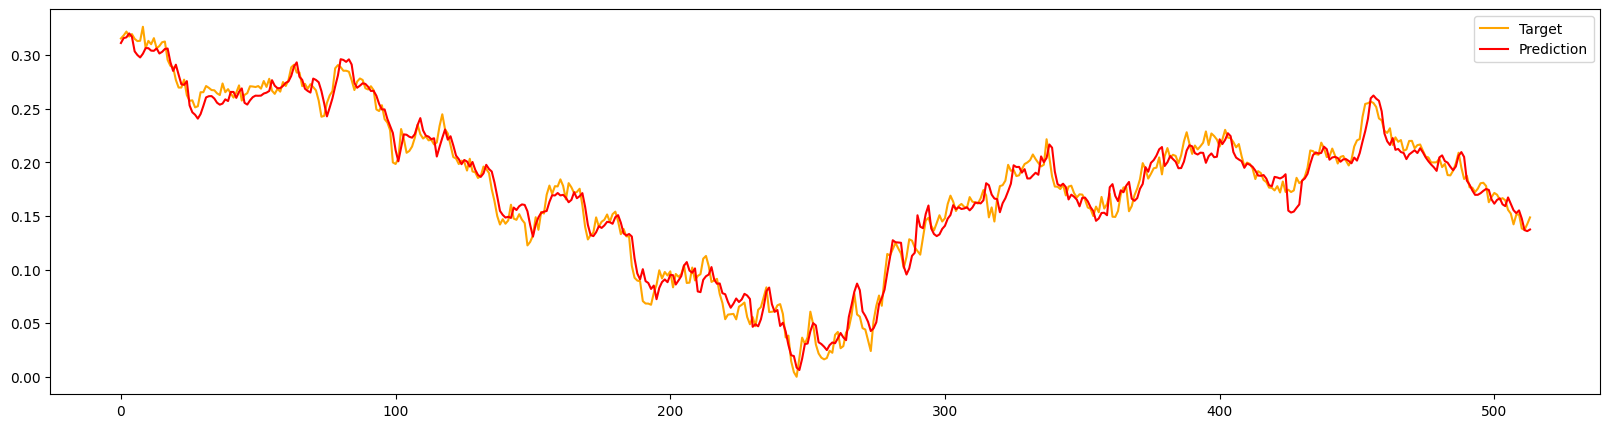

In [ ]:
comp = pd.DataFrame({'Column1':test4Dynamic_labels[:,-1,:][:,3],'Column2':new_predictions[:,-1,:][:,3]})
plt.figure(figsize=(20,5))
plt.plot(comp['Column1'], color='orange', label='Target')
plt.plot(comp['Column2'], color='red', label='Prediction')
plt.legend()
plt.show()

In [ ]:
amount_of_profit

123049.01327439437

In [ ]:
amount_of_profit = 0
for i in range(1,len(new_predictions)):
  if (test4Dynamic[i,-1,3] > test4Dynamic[i-1,-1,3]):
    if(test4Dynamic[i-1,-1,3]==0):
          print("i zero...else..."+str(i))
    else:
      if(new_predictions[i,-1,3] > test4Dynamic[i-1,-1,3]):
        amount_of_profit += ((min(new_predictions[i,-1,3],test4Dynamic[i,-1,3])-test4Dynamic[i-1,-1,3])/test4Dynamic[i-1,-1,3]) *10000
      else:
        amount_of_profit += -(test4Dynamic[i,-1,3] - test4Dynamic[i-1,-1,3])/test4Dynamic[i-1,-1,3] * 10000
  else:
    if(test4Dynamic[i-1,-1,3]==0):
          print("i zero...else..."+str(i))
    else:
      if (new_predictions[i,-1,3] <test4Dynamic[i-1,-1,3] ):
        amount_of_profit += (test4Dynamic[i-1,-1,3] - max(new_predictions[i,-1,3],test4Dynamic[i,-1,3]))/test4Dynamic[i-1,-1,3] * 10000
      else:
        amount_of_profit += (test4Dynamic[i,-1,3]-test4Dynamic[i-1,-1,3])/test4Dynamic[i-1,-1,3]*10000

i zero...else...248


In [ ]:
df_stock = yf.download('EURUSD=X', start='2000-01-01', end='2023-10-14',interval="1wk")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
weekly_data = normalize_data(df_stock)

In [ ]:
column_indices,train_df_week,val_df_week,test_df_week = spilitData(weekly_data)


In [ ]:
multi_window_week = WindowGenerator(input_width=n_steps,
                               label_width=1,
                               shift=1)
multi_window_week.train = multi_window.make_dataset(train_df_week)
multi_window_week.val = multi_window.make_dataset(val_df_week)
multi_window_week.test = multi_window.make_dataset(test_df_week)

In [ ]:
history = compile_and_fit(feedback_model, multi_window_week,50)

Epoch 1/50
65/65 [==============================] - 4s 18ms/step - loss: 7.5068e-04 - mean_absolute_error: 0.0177 - val_loss: 2.0786e-04 - val_mean_absolute_error: 0.0110
Epoch 2/50
65/65 [==============================] - 1s 16ms/step - loss: 4.8399e-04 - mean_absolute_error: 0.0137 - val_loss: 2.3672e-04 - val_mean_absolute_error: 0.0124
Epoch 3/50
65/65 [==============================] - 1s 15ms/step - loss: 8.3309e-04 - mean_absolute_error: 0.0181 - val_loss: 2.8105e-04 - val_mean_absolute_error: 0.0119
Epoch 4/50
65/65 [==============================] - 1s 15ms/step - loss: 5.5543e-04 - mean_absolute_error: 0.0145 - val_loss: 1.4622e-04 - val_mean_absolute_error: 0.0088
Epoch 5/50
65/65 [==============================] - 1s 22ms/step - loss: 7.0855e-04 - mean_absolute_error: 0.0169 - val_loss: 1.4759e-04 - val_mean_absolute_error: 0.0087
Epoch 6/50
65/65 [==============================] - 1s 16ms/step - loss: 7.1255e-04 - mean_absolute_error: 0.0171 - val_loss: 2.3454e-04 - val_me

In [ ]:
predictions = feedback_model.predict(multi_window_week.test)

2/2 [==============================] - 0s 8ms/step
